In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ImageSize = 300


In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    shuffle=True,
    image_size = (ImageSize, ImageSize)
)

Found 3000 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['airplanes', 'cats', 'ship']

In [5]:
len(dataset)

94

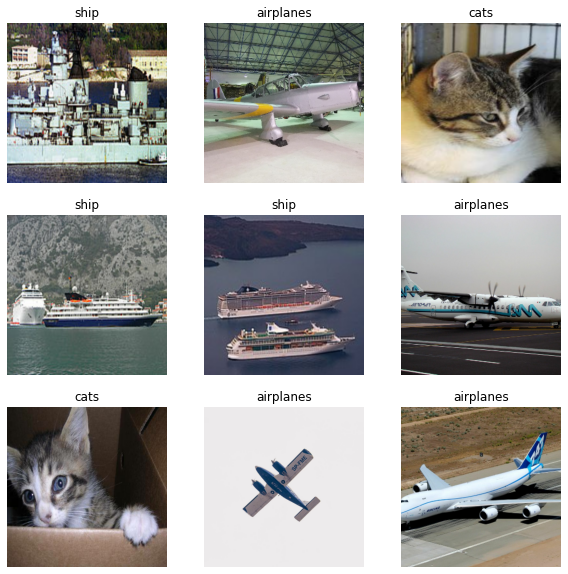

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(9):
        s = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("int"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)*0.8

75.2

In [8]:
train_ds = dataset.take(75)

In [9]:
test_ds = dataset.skip(75)
len(test_ds)

19

In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(300, 300, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [11]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
cnn.fit(train_ds, epochs=10)

Epoch 1/10
75/75 [==============================] - 291s 4s/step - loss: 61.3126 - accuracy: 0.6142
Epoch 2/10
75/75 [==============================] - 302s 4s/step - loss: 0.4801 - accuracy: 0.8413
Epoch 3/10
75/75 [==============================] - 301s 4s/step - loss: 0.2049 - accuracy: 0.9358
Epoch 4/10
75/75 [==============================] - 287s 4s/step - loss: 0.2720 - accuracy: 0.9275
Epoch 5/10
75/75 [==============================] - 283s 4s/step - loss: 0.3590 - accuracy: 0.8963
Epoch 6/10
75/75 [==============================] - 281s 4s/step - loss: 0.2700 - accuracy: 0.9304
Epoch 7/10
75/75 [==============================] - 283s 4s/step - loss: 0.0965 - accuracy: 0.9758
Epoch 8/10
75/75 [==============================] - 283s 4s/step - loss: 0.0861 - accuracy: 0.9829
Epoch 9/10
75/75 [==============================] - 282s 4s/step - loss: 0.0253 - accuracy: 0.9962
Epoch 10/10
75/75 [==============================] - 283s 4s/step - loss: 0.0126 - accuracy: 0.9971


In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 313600)            0

In [14]:
cnn.evaluate(test_ds)

19/19 [==============================] - 19s 1s/step - loss: 0.2465 - accuracy: 0.9450


[0.24647404253482819, 0.9449999928474426]

In [17]:
img_predict = cnn.predict(test_ds)

In [18]:
img_class = [np.argmax(element) for element in img_predict]
img_class[:5]

[2, 0, 2, 1, 1]

actual label: airplanes
predicted label: airplanes


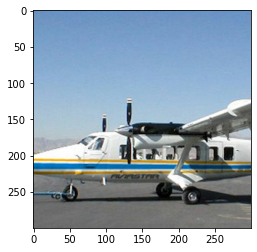

In [20]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('int')
    first_label = labels_batch[0].numpy()
    
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = cnn.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [21]:
cnn.save("saved model/")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved model/assets
